# Plots for the bosonic BMN2 results

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data at fixed coupling

The `csv` files contain the energy expectation values $\langle E | \hat{H} | E \rangle$ and the gauge generators expectation values $\langle E | \sum_{\alpha=1}^{3} \hat{G}^2_{\alpha} | E \rangle$ 

* The Hamiltonian $\hat{H}$ is the one of the bosonic BMN2 system with coupling $\lambda=g^2N$ and with truncated operators with cutoff $\Lambda$
* The states $|E\rangle$ are the eigenstates of $\hat{H}$
* The states $|E'\rangle$ are the eigenstates ot $\hat{H}' = \hat{H} + \Lambda \sum_{\alpha=1}^{3} \hat{G}^2_{\alpha}$

In [93]:
gs = pd.read_csv('l02_gs_many.csv', header=0, dtype={"Penalty": int, "Lambda": int})
gv = pd.read_csv('l02_gv_many.csv', header=0, dtype={"Penalty": int, "Lambda": int})

In [46]:
# coupling constant. We only have one for now
l = gs["Coupling"].unique()[0]

<AxesSubplot:xlabel='Lambda'>

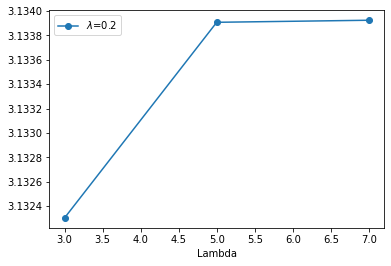

In [47]:
gs.query("Penalty == 0").plot(x="Lambda", y="Energy0", marker="o", label=rf"$\lambda$={l}")

<AxesSubplot:xlabel='Lambda'>

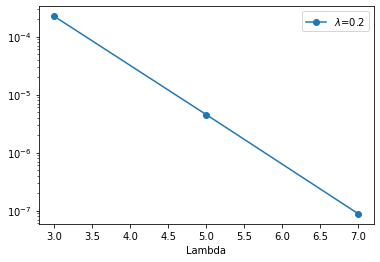

In [41]:
gv.query("Penalty == 0").plot(x="Lambda", y="GaugeViolation0", marker="o", logy=True, label=rf"$\lambda$={l}")

## Plot the energy expectation values

In [51]:
from matplotlib.ticker import IndexLocator

def plot_energies(energies, n=20):
    fig, ax = plt.subplots()
    for L in energies.Lambda:
        data = energies.query("Lambda == @L").iloc[0,1:(n+1)]
        # n eigenvalues
        x = np.arange(0,n)
        y = data.values
        ax.plot(x,y, label=rf"$\Lambda=${L}")
    ax.grid()
    ax.set_xlabel("eigenvalue")
    ax.xaxis.set_major_locator(IndexLocator(1,0))
    ax.set_ylabel(r"$E$", rotation=90)
    # ax.set_xlabel(r"$\Lambda$")
    ax.legend(loc="lower right")

### Eigenvalues when the eigenstates are obtained from $\hat{H}$

In [43]:
eigs = gs.query("Penalty == 0").iloc[:,2:]
eigs

,Lambda,Energy0,Energy1,Energy2,Energy3,Energy4,Energy5,Energy6,Energy7,Energy8,...,Energy10,Energy11,Energy12,Energy13,Energy14,Energy15,Energy16,Energy17,Energy18,Energy19
0,3,3.132305,4.219673,4.219673,4.219673,4.219673,4.219673,4.219673,5.087531,5.133035,...,5.229573,5.229573,5.233168,5.262656,5.265077,5.265077,5.265077,5.335795,5.335795,5.335795
1,5,3.133908,4.215774,4.215774,4.215774,4.215774,4.215774,4.215774,5.216718,5.219716,...,5.252896,5.255372,5.255372,5.255372,5.330605,5.330605,5.332113,5.332113,5.332113,5.332165
2,7,3.133925,4.215738,4.215738,4.215738,4.215738,4.215738,4.215738,5.219478,5.219540,...,5.255244,5.255291,5.255291,5.255291,5.332142,5.332142,5.332163,5.332163,5.332163,5.332165


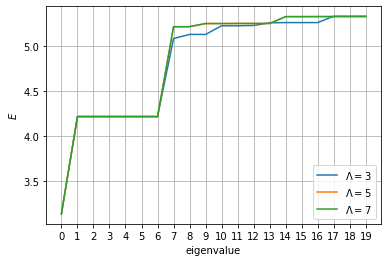

In [56]:
plot_energies(eigs,20)


### Eigenvalues when the eigenstates are obtained from $\hat{H}'$

In [35]:
eigsp = gs.query("Penalty > 0").iloc[:,2:]
eigsp

,Lambda,Energy0,Energy1,Energy2,Energy3,Energy4,Energy5,Energy6,Energy7,Energy8,...,Energy10,Energy11,Energy12,Energy13,Energy14,Energy15,Energy16,Energy17,Energy18,Energy19
3,3,3.132349,5.087968,5.241913,5.264302,7.066203,7.228764,7.234682,7.574414,9.143657,...,9.266154,9.338778,9.500625,4.224527,4.224527,4.224527,4.224527,4.224527,4.224527,11.237215
4,5,3.133910,5.217006,5.219966,5.356479,7.236652,7.328839,7.338266,7.345103,7.442564,...,9.271182,9.395736,9.397563,9.459155,9.489882,9.861132,10.253354,10.342069,11.315109,11.411153
5,7,3.133925,5.219488,5.219546,5.357606,7.301123,7.303631,7.382238,7.420971,7.423740,...,9.360404,9.405902,9.424183,9.436082,9.514024,9.528954,9.532637,10.009497,10.044401,10.450610


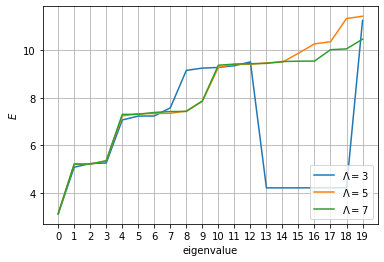

In [55]:
plot_energies(eigsp,20)

Some eigenstates of $\hat{H}'$ where pushed to a higher energy than they would have had if they came from $\hat{H}$. That also depends on the cutoff.

### Plot the gauge constraint violation

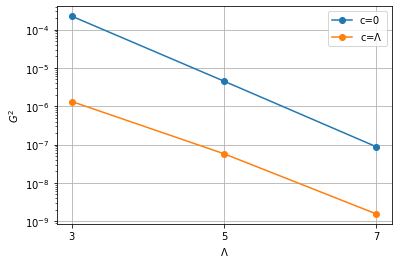

In [61]:
from matplotlib.ticker import FixedLocator

fig, ax = plt.subplots()
gv.query("Penalty == 0").plot(x="Lambda", y="GaugeViolation0", logy=True, marker="o", label="c=0", ax=ax)
gv.query("Penalty > 0").plot(x="Lambda", y="GaugeViolation0", logy=True, marker="o", label=r"c=$\Lambda$", ax=ax)
ax.grid()
ax.set_xlabel(r"$\Lambda$")
ax.xaxis.set_major_locator(FixedLocator([3,5,7]))
ax.set_ylabel(r"$G^2$", rotation=90)
ax.legend(loc="upper right")

In [62]:
from matplotlib.ticker import IndexLocator

def plot_gauge(gauge, n=20):
    fig, ax = plt.subplots()
    for L in gauge.Lambda:
        data = gauge.query("Lambda == @L").iloc[0,1:(n+1)]
        # n eigenvalues
        x = np.arange(0,n)
        y = data.values
        ax.plot(x,y, label=rf"$\Lambda=${L}")
    ax.grid()
    ax.set_yscale('log')
    ax.set_xlabel("eigenvalue")
    ax.xaxis.set_major_locator(IndexLocator(1,0))
    ax.set_ylabel(r"$G^2$", rotation=90)
    ax.legend(loc="upper right")

### Without $G^2$ penalty

In [63]:
eigs = gv.query("Penalty == 0").iloc[:,2:]
eigs

,Lambda,GaugeViolation0,GaugeViolation1,GaugeViolation2,GaugeViolation3,GaugeViolation4,GaugeViolation5,GaugeViolation6,GaugeViolation7,GaugeViolation8,...,GaugeViolation10,GaugeViolation11,GaugeViolation12,GaugeViolation13,GaugeViolation14,GaugeViolation15,GaugeViolation16,GaugeViolation17,GaugeViolation18,GaugeViolation19
0,3,2.242938e-04,2.006097,2.006097,2.006097,2.006097,2.006097,2.006097,0.001181,6.003545,...,6.000094,6.000094,0.044634,0.014320,6.005928,6.005928,6.005928,6.003716,6.003716,6.003716
1,5,4.511062e-06,2.000098,2.000098,2.000098,2.000098,2.000098,2.000098,0.001369,0.000423,...,6.000563,6.000356,6.000356,6.000356,6.000354,6.000354,6.000297,6.000297,6.000297,5.999148
2,7,8.765031e-08,2.000002,2.000002,2.000002,2.000002,2.000002,2.000002,0.000025,0.000007,...,6.000014,6.000006,6.000006,6.000006,6.000007,6.000007,6.000005,6.000005,6.000005,5.999985


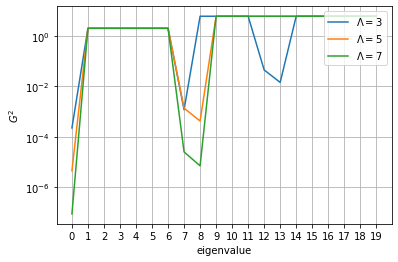

In [64]:
plot_gauge(eigs)

Maybe not all the smallest $G^2$ values are included in the first 20 eigenvalues. We have done a search on 100 eigenstates for $\Lambda=4$ and we had to change the `sparse=True` option of the solver and do it exactly so that we could handle all degeneracies.

In [230]:
dd = np.loadtxt('l02_L4_100.csv', delimiter=",")
# with no penalty
energies = dd[0]
gauge = dd[1]
df = pd.DataFrame(columns=["Energy","Gauge"])
df["Energy"] = energies
df["Gauge"] = gauge
# with penalty
energies = dd[2]
gauge = dd[3]
dfp = pd.DataFrame(columns=["Energy","Gauge"])
dfp["Energy"] = energies
dfp["Gauge"] = gauge


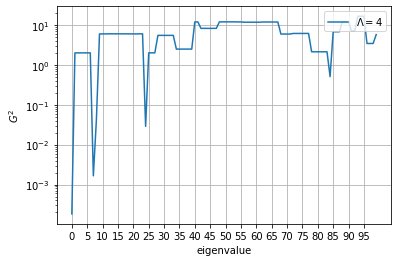

In [231]:
fig, ax = plt.subplots()
L = 4
n = 100
data = df["Gauge"]
# n eigenvalues
x = np.arange(0,n)
y = data.iloc[:n].values
ax.plot(x,y, label=rf"$\Lambda=${L}")
ax.grid()
ax.set_yscale('log')
ax.set_xlabel("eigenvalue")
ax.xaxis.set_major_locator(IndexLocator(5,0))
ax.set_ylabel(r"$G^2$", rotation=90)
ax.legend(loc="upper right")

The eigenstates with the smallest value of $G^2$

In [232]:
df.nsmallest(5,columns="Gauge")

,Energy,Gauge
0,3.134063,0.000184
7,5.217642,0.001662
24,5.366389,0.028882
8,5.236170,0.043901
84,7.191393,0.508276


In [234]:
dfp.nsmallest(5,columns="Gauge")

,Energy,Gauge
0,3.134149,0.000006
1,5.218007,0.000014
3,5.371608,0.000120
6,7.361751,0.000268
2,5.247088,0.000331


The five lowest eigenstates of $\hat{H}'$ (which are different from the lowest values of $\langle E | \hat{H} | E \rangle$)

In [235]:
dfp.iloc[:5]

,Energy,Gauge
0,3.134149,0.000006
1,5.218007,0.000014
2,5.247088,0.000331
3,5.371608,0.000120
4,7.224794,0.000609


Plot Fig. 4 of the draft using $\Lambda=4$ data

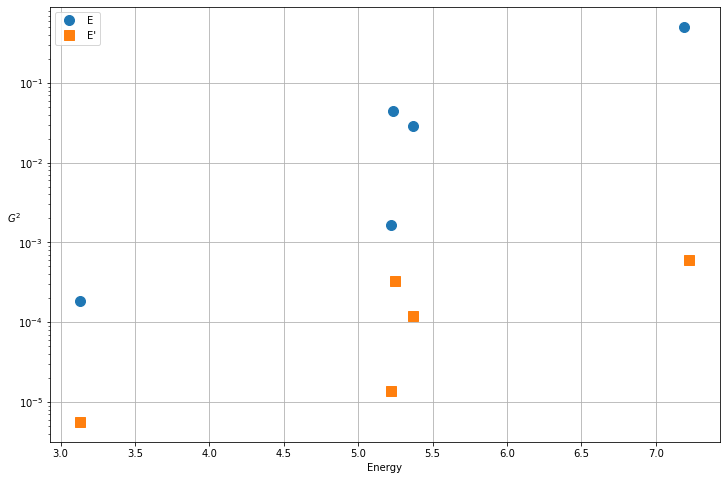

In [237]:
fig, ax = plt.subplots(figsize=(12,8))
L = 4
# 5 smallest GV for action with no penalty
df.nsmallest(5,columns="Gauge").plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="o",
    markersize=10,
    logy=True,
    label=rf"E",
    ax=ax,
)
# 5 lowest eigenstates for action with penalty
dfp.iloc[:5].plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="s",
    markersize=10,
    logy=True,
    label=rf"E'",
    ax=ax,
)
ax.grid()
ax.set_xlabel("Energy", rotation=0)
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="upper left")
plt.savefig(f"l02_gs_gv_small5_L4.pdf")

### With $G^2$ penalty 

In [65]:
eigsp = gv.query("Penalty > 0").iloc[:,2:]
eigsp

,Lambda,GaugeViolation0,GaugeViolation1,GaugeViolation2,GaugeViolation3,GaugeViolation4,GaugeViolation5,GaugeViolation6,GaugeViolation7,GaugeViolation8,...,GaugeViolation10,GaugeViolation11,GaugeViolation12,GaugeViolation13,GaugeViolation14,GaugeViolation15,GaugeViolation16,GaugeViolation17,GaugeViolation18,GaugeViolation19
3,3,1.327542e-06,2.890487e-05,2.296810e-04,3.424909e-05,0.000011,0.000106,0.000039,0.000505,0.000112,...,0.000414,0.000216,0.000684,1.998869,1.998869,1.998869,1.998869,1.998869,1.998869,0.000091
4,5,5.740269e-08,5.494228e-06,2.373002e-05,1.296690e-06,0.000071,0.000050,0.000966,0.000034,0.000321,...,0.000252,0.000263,0.000257,0.000216,0.000648,0.001183,0.011324,0.000427,0.000346,0.000177
5,7,1.544712e-09,2.333717e-07,4.782974e-07,4.157539e-08,0.000004,0.000037,0.000006,0.000004,0.000011,...,0.000037,0.000306,0.000048,0.000063,0.000014,0.000471,0.000406,0.000193,0.000550,0.000071


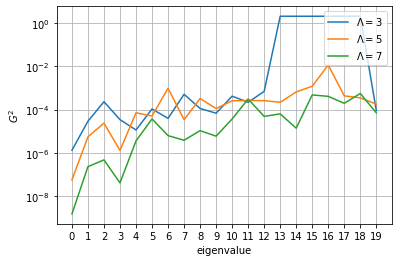

In [66]:
plot_gauge(eigsp)

## Combine gauge violation and energy

We want to order the eigenvalues using the $G^2$ expectation value and show that the ones with low values, which are probably closer to being gauge singlets, don't have their energy modified too much when the Hamiltonian is modified

**Note** 
What follows in this section is not correct because using the sparse solver can cause errors when dealing with degeneracies and we also seem to need more than the lowest 20 eigenvalues (more like 100)

In [67]:
data = pd.merge(gs,gv)
data

,Penalty,Coupling,Lambda,Energy0,Energy1,Energy2,Energy3,Energy4,Energy5,Energy6,...,GaugeViolation10,GaugeViolation11,GaugeViolation12,GaugeViolation13,GaugeViolation14,GaugeViolation15,GaugeViolation16,GaugeViolation17,GaugeViolation18,GaugeViolation19
0,0,0.2,3,3.132305,4.219673,4.219673,4.219673,4.219673,4.219673,4.219673,...,6.000094,6.000094,0.044634,0.014320,6.005928,6.005928,6.005928,6.003716,6.003716,6.003716
1,0,0.2,5,3.133908,4.215774,4.215774,4.215774,4.215774,4.215774,4.215774,...,6.000563,6.000356,6.000356,6.000356,6.000354,6.000354,6.000297,6.000297,6.000297,5.999148
2,0,0.2,7,3.133925,4.215738,4.215738,4.215738,4.215738,4.215738,4.215738,...,6.000014,6.000006,6.000006,6.000006,6.000007,6.000007,6.000005,6.000005,6.000005,5.999985
3,3,0.2,3,3.132349,5.087968,5.241913,5.264302,7.066203,7.228764,7.234682,...,0.000414,0.000216,0.000684,1.998869,1.998869,1.998869,1.998869,1.998869,1.998869,0.000091
4,5,0.2,5,3.133910,5.217006,5.219966,5.356479,7.236652,7.328839,7.338266,...,0.000252,0.000263,0.000257,0.000216,0.000648,0.001183,0.011324,0.000427,0.000346,0.000177
5,7,0.2,7,3.133925,5.219488,5.219546,5.357606,7.301123,7.303631,7.382238,...,0.000037,0.000306,0.000048,0.000063,0.000014,0.000471,0.000406,0.000193,0.000550,0.000071


Select a data point of fixed `Coupling`, `Penalty` and `Lambda`

In [97]:
L = 5
df = pd.DataFrame(columns=['Energy', 'Gauge'])
df['Energy'] = gs.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L").loc[:,gs.columns[3:]].reset_index(drop=True).iloc[0].values
df['Gauge'] = gv.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L").loc[:,gv.columns[3:]].reset_index(drop=True).iloc[0].values

Get the smallest 5 values of $G^2$ and the corresponding energies

In [105]:
df.nsmallest(6,columns=["Gauge"])

,Energy,Gauge
0,3.133908,0.000005
8,5.219716,0.000423
7,5.216718,0.001369
1,4.215774,2.000098
6,4.215774,2.000098
3,4.215774,2.000098


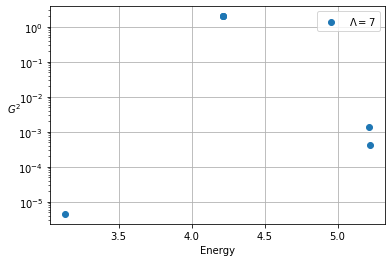

In [103]:
fig, ax = plt.subplots()
df.nsmallest(6,columns=["Gauge"]).plot(x='Energy',y='Gauge', linestyle="", marker="o", logy=True, label=r"$\Lambda=7$", ax=ax)
ax.grid()
ax.set_ylabel(r"$G^2$",rotation=0)
ax.legend(loc="upper right")

In [194]:
def get_n_smallest_gauge(gs, gv, n):
    df = pd.DataFrame(columns=["Energy", "Gauge"])
    df["Energy"] = gs.loc[:, gs.columns[3:]].reset_index(drop=True).iloc[0].values
    df["Gauge"] = gv.loc[:, gv.columns[3:]].reset_index(drop=True).iloc[0].values
    return df.nsmallest(n, columns=["Gauge"])



In [195]:
def get_n_smallest_energy(gs, gv, n):
    df = pd.DataFrame(columns=["Energy", "Gauge"])
    df["Energy"] = gs.loc[:, gs.columns[3:]].reset_index(drop=True).iloc[0].values
    df["Gauge"] = gv.loc[:, gv.columns[3:]].reset_index(drop=True).iloc[0].values
    return df.nsmallest(n, columns=["Energy"])

In [240]:
def get_n_smallest(gs, gv, n):
    df = pd.DataFrame(columns=["Energy", "Gauge"])
    df["Energy"] = gs.loc[:, gs.columns[3:]].reset_index(drop=True).iloc[0].values
    df["Gauge"] = gv.loc[:, gv.columns[3:]].reset_index(drop=True).iloc[0].values
    return df.iloc[:n]

With no penalty

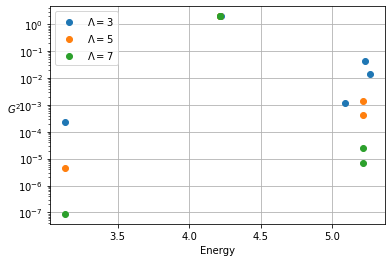

In [238]:
fig, ax = plt.subplots()
for L in [3, 5, 7]:
    n_small = get_n_smallest_gauge(
        gs.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
        gv.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
        5,
    )
    n_small.plot(
        x="Energy",
        y="Gauge",
        linestyle="",
        marker="o",
        logy=True,
        label=rf"$\Lambda=${L}",
        ax=ax,
    )
ax.grid()
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="upper left")


With penalty

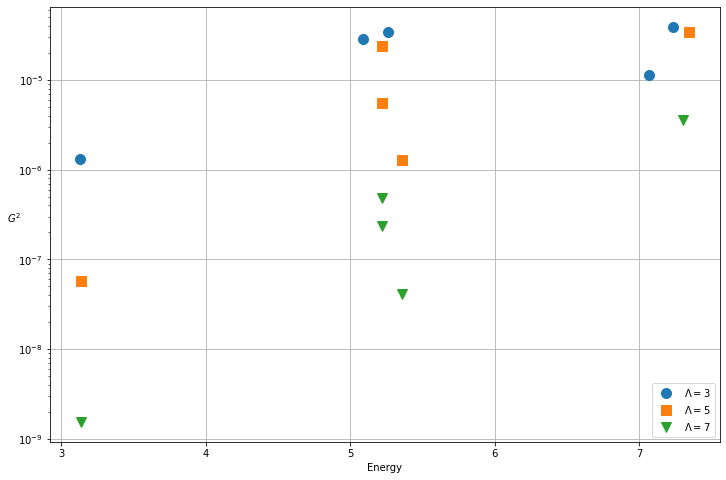

In [239]:
fig, ax = plt.subplots(figsize=(12,8))
markers = ["o","s","v"]
for i,L in enumerate([3, 5, 7]):
    n_small = get_n_smallest_gauge(
        gs.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
        gv.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
        5,
    )
    n_small.plot(
        x="Energy",
        y="Gauge",
        linestyle="",
        marker=markers[i],
        markersize=10,
        logy=True,
        label=rf"$\Lambda=${L}",
        ax=ax,
    )
ax.grid()
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="lower right")


With penalty but the lowest 5 eigenstates (without looking at the energy values)

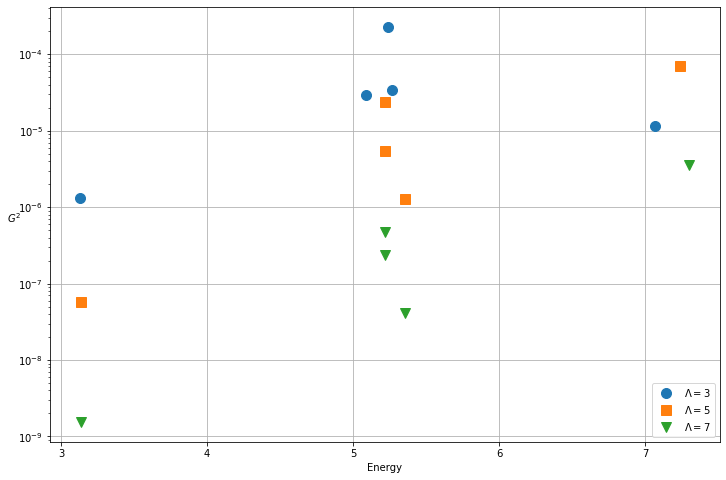

In [241]:
fig, ax = plt.subplots(figsize=(12,8))
markers = ["o","s","v"]
for i,L in enumerate([3, 5, 7]):
    n_small = get_n_smallest(
        gs.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
        gv.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
        5,
    )
    n_small.plot(
        x="Energy",
        y="Gauge",
        linestyle="",
        marker=markers[i],
        markersize=10,
        logy=True,
        label=rf"$\Lambda=${L}",
        ax=ax,
    )
ax.grid()
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="lower right")

Get the original eigenstates with the smallest gauge and the perturbed eigenstates with the smallest energy

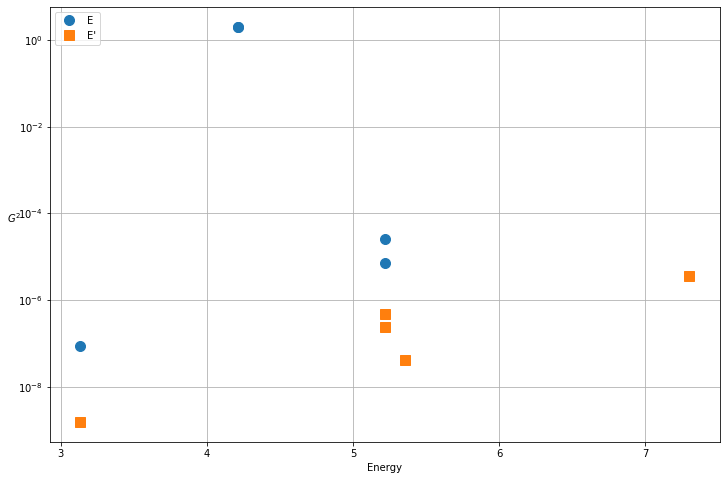

In [242]:
fig, ax = plt.subplots(figsize=(12,8))
L = 7
n_small_p = get_n_smallest(
    gs.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
    gv.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
    5,
)
n_small = get_n_smallest_gauge(
    gs.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
    gv.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
    5,
)
n_small.plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="o",
    markersize=10,
    logy=True,
    label=rf"E",
    ax=ax,
)
n_small_p.plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="s",
    markersize=10,
    logy=True,
    label=rf"E'",
    ax=ax,
)
ax.grid()
ax.set_xlabel("Energy", rotation=0)
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="upper left")
plt.savefig(f"l02_gs_gv_small5_L7.pdf")

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
L = 5
n_small_p = get_n_smallest_energy(
    gs.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
    gv.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
    5,
)
n_small = get_n_smallest_gauge(
    gs.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
    gv.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
    5,
)
n_small.plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="o",
    markersize=10,
    logy=True,
    label=rf"E",
    ax=ax,
)
n_small_p.plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="s",
    markersize=10,
    logy=True,
    label=rf"E'",
    ax=ax,
)
ax.grid()
ax.set_xlabel("Energy", rotation=0)
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="upper left")
plt.savefig(f"l20_gs_gv_small5_L7.pdf")

## Load data with multiple couplings

Get the data for the energy expectation values and the gauge constraint operator expectation values at multiple cutoffs.

In [153]:
gs_all = pd.read_csv('gs_many.csv', header=0, dtype={"Penalty": int, "Lambda": int})
gv_all = pd.read_csv('gv_many.csv', header=0, dtype={"Penalty": int, "Lambda": int})

In [154]:
l = 1.0 
ls = str(l).replace(".","")
data_gs = gs_all.query("Coupling == @l")

## Plot the energy expectation value

Make a plot for each eigenstate. The eigenstates come from diagonalizing the modified Hamiltonian $\hat{H}'$ with $c=\Lambda$.

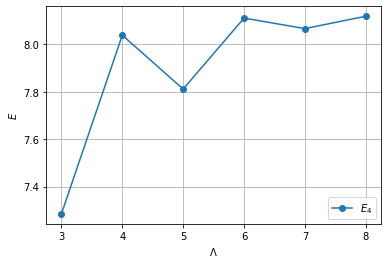

In [158]:
state = 4
name = f'Energy{int(state)}'
fig, ax = plt.subplots()
data_gs.plot(x="Lambda", y=name, marker="o", label=rf"$E_{state}$", ax=ax)
ax.grid()
ax.set_ylabel(rf"$E$", rotation=90)
ax.set_xlabel(r"$\Lambda$")
ax.legend(loc="lower right")
plt.savefig(f"l{ls}_gs_e{state}.pdf")

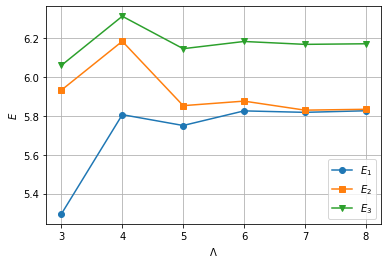

In [159]:
markers = ['o','s','v']
fig, ax = plt.subplots()
for state in [1,2,3]:
    name = f'Energy{int(state)}'
    data_gs.plot(x="Lambda", y=name, marker=markers[state-1], label=rf"$E_{state}$", ax=ax)
ax.grid()
ax.set_ylabel(rf"$E$", rotation=90)
ax.set_xlabel(r"$\Lambda$")
ax.legend(loc="lower right")
ls = str(l).replace(".","")
plt.savefig(f"l{ls}_gs_e123.pdf")

## Plot gauge violation

In [174]:
l = 0.2
ls = str(l).replace(".","")
data_gv = gv_all.query("Coupling == @l")

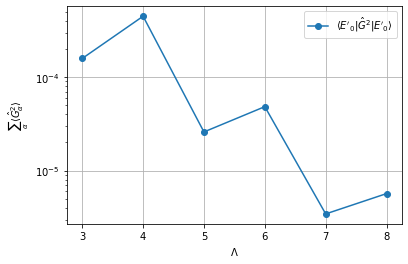

In [171]:
state = 0
name = f"GaugeViolation{int(state)}"
fig, ax = plt.subplots()
data_gv.plot(x="Lambda", y=name, logy=True, marker="o", label=rf"$\langle E'_{state}|\hat{{G}}^2|E'_{state}\rangle$", ax=ax)
ax.grid()
ax.set_ylabel(r"$\sum_\alpha\langle \hat{G}^2_\alpha \rangle$", rotation=90)
ax.set_xlabel(r"$\Lambda$")
ax.legend(loc="upper right")
plt.savefig(f"l{ls}_gv_e{state}.pdf")


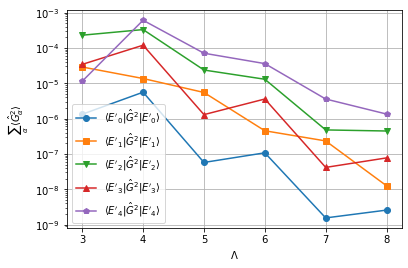

In [175]:
markers = ["o", "s", "v", "^", "p"]
fig, ax = plt.subplots()
for state in [0, 1, 2, 3, 4]:
    name = f"GaugeViolation{int(state)}"
    data_gv.plot(
        x="Lambda",
        y=name,
        logy=True,
        marker=markers[state],
        label=rf"$\langle E'_{state}|\hat{{G}}^2|E'_{state}\rangle$",
        ax=ax,
    )
ax.grid()
ax.set_ylabel(r"$\sum_\alpha\langle \hat{G}^2_\alpha \rangle$", rotation=90)
ax.set_xlabel(r"$\Lambda$")
# ax.legend(bbox_to_anchor = (1.05, 1.0))
ax.legend(loc="lower left")
plt.savefig(f"l{ls}_gv_e01234.pdf")


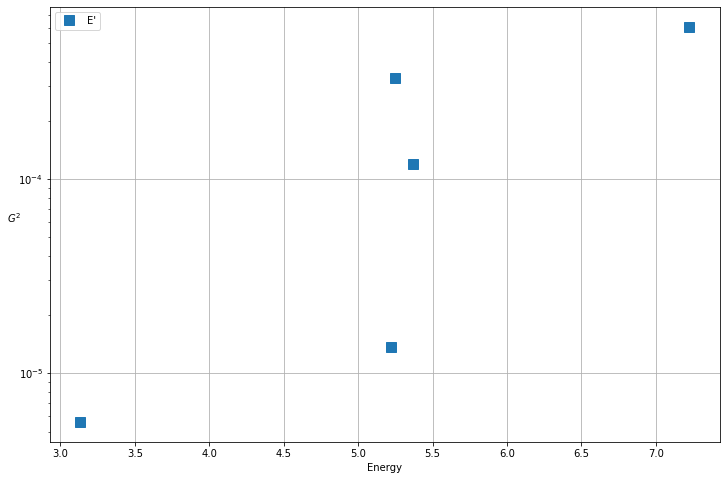

In [201]:
fig, ax = plt.subplots(figsize=(12,8))
L = 4
n_small_p = get_n_smallest_energy(
    gs_all.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
    gv_all.query("Penalty > 0 & Coupling == 0.2 & Lambda == @L"),
    5,
)
# n_small = get_n_smallest_gauge(
#     gs_all.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
#     gv_all.query("Penalty == 0 & Coupling == 0.2 & Lambda == @L"),
#     5,
# )
# n_small.plot(
#     x="Energy",
#     y="Gauge",
#     linestyle="",
#     marker="o",
#     markersize=10,
#     logy=True,
#     label=rf"E",
#     ax=ax,
# )
n_small_p.plot(
    x="Energy",
    y="Gauge",
    linestyle="",
    marker="s",
    markersize=10,
    logy=True,
    label=rf"E'",
    ax=ax,
)
ax.grid()
ax.set_xlabel("Energy", rotation=0)
ax.set_ylabel(r"$G^2$", rotation=0)
ax.legend(loc="upper left")
# plt.savefig(f"l20_gs_gv_small5_L4.pdf")